In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
filepath = 'Datasets/Kaggle Cleaned/Life Expectancy Kaggle.csv'
df = pd.read_csv(filepath)
df.head()

,Country,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2000,54.800,321.000,88,0.010,10.425,62.000,6532,12.200,122,24.000,8.200,24.000,0.100,2.300,2.500,0.338,5.500
1,Afghanistan,2001,55.300,316.000,88,0.010,10.575,63.000,8762,12.600,122,35.000,7.800,33.000,0.100,2.100,2.400,0.340,5.900
2,Afghanistan,2002,56.200,3.000,88,0.010,16.887,64.000,2486,13.000,122,36.000,7.760,36.000,0.100,19.900,2.200,0.341,6.200
3,Afghanistan,2003,56.700,295.000,87,0.010,11.089,65.000,798,13.400,122,41.000,8.820,41.000,0.100,19.700,19.900,0.373,6.500
4,Afghanistan,2004,57.000,293.000,87,0.020,15.296,67.000,466,13.800,120,5.000,8.790,5.000,0.100,19.500,19.700,0.381,6.800


In [3]:
df.describe()

,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000,2445.000
mean,2007.000,68.795,166.645,31.063,4.310,666.402,75.976,2309.798,37.670,43.022,82.087,5.769,81.998,1.917,5.084,5.129,0.615,11.815
std,4.321,9.260,125.083,125.768,3.938,1683.994,28.413,10974.311,19.778,171.249,23.470,2.307,23.703,5.482,4.531,4.621,0.207,3.162
min,2000.000,36.300,1.000,0.000,0.010,0.000,2.000,0.000,1.000,0.000,3.000,0.370,2.000,0.100,0.100,0.100,0.000,0.000
25%,2003.000,63.000,76.000,0.000,0.680,16.755,67.000,0.000,18.800,0.000,77.000,4.240,78.000,0.100,1.700,1.700,0.487,10.000
50%,2007.000,71.800,146.000,3.000,3.410,90.761,89.000,16.000,42.700,4.000,92.000,5.620,92.000,0.100,3.500,3.500,0.666,12.200
75%,2011.000,75.000,227.000,20.000,7.170,471.831,96.000,353.000,55.500,25.000,97.000,7.200,97.000,0.900,7.400,7.400,0.760,13.900
max,2014.000,89.000,723.000,1800.000,17.870,18961.349,99.000,212183.000,77.100,2500.000,99.000,14.390,99.000,50.600,27.700,28.600,0.936,20.700


In [4]:
corr = df.drop(['Country', 'Year',], axis=1).corr()
high_corr_pairs = []

# Iterate over the correlation matrix
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):  # i+1 to avoid self-correlation
        if corr.columns[i] == 'Life expectancy' or corr.columns[j] == 'Life expectancy':
            continue
        if np.abs(corr.iloc[i, j]) > 0.8:  # Check for absolute value > 0.8
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

# Print the pairs
for pair in high_corr_pairs:
    print(f"{pair[0]}, {pair[1]} - Correlation: {pair[2]:.2f}")
    

Infant deaths, Under-five deaths - Correlation: 1.00
Thinness 1-19 years, Thinness 5-9 years - Correlation: 0.93


In [5]:
df.drop(['Thinness 5-9 years', 'Under-five deaths'], axis=1, inplace=True)
df

,Country,Year,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Thinness 1-19 years,Income composition of resources,Schooling
0,Afghanistan,2000,54.800,321.000,88,0.010,10.425,62.000,6532,12.200,24.000,8.200,24.000,0.100,2.300,0.338,5.500
1,Afghanistan,2001,55.300,316.000,88,0.010,10.575,63.000,8762,12.600,35.000,7.800,33.000,0.100,2.100,0.340,5.900
2,Afghanistan,2002,56.200,3.000,88,0.010,16.887,64.000,2486,13.000,36.000,7.760,36.000,0.100,19.900,0.341,6.200
3,Afghanistan,2003,56.700,295.000,87,0.010,11.089,65.000,798,13.400,41.000,8.820,41.000,0.100,19.700,0.373,6.500
4,Afghanistan,2004,57.000,293.000,87,0.020,15.296,67.000,466,13.800,5.000,8.790,5.000,0.100,19.500,0.381,6.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,Zimbabwe,2010,52.400,527.000,29,5.210,53.309,9.000,9696,29.400,89.000,5.370,89.000,15.700,7.100,0.436,10.000
2441,Zimbabwe,2011,54.900,464.000,28,6.000,63.751,94.000,0,29.900,93.000,6.310,93.000,13.300,6.800,0.452,10.100
2442,Zimbabwe,2012,56.600,429.000,26,6.090,92.602,97.000,0,3.300,95.000,6.690,95.000,8.800,6.500,0.464,9.800
2443,Zimbabwe,2013,58.000,399.000,25,6.390,10.667,95.000,0,3.800,95.000,6.880,95.000,6.800,6.200,0.488,10.400


In [6]:
df.skew(axis = 0, numeric_only = True)

Year                               0.000
Life expectancy                   -0.686
Adult mortality                    1.221
Infant deaths                      9.484
Alcohol                            0.718
Percentage expenditure             4.732
Hepatitis B                       -1.438
Measles                            9.665
BMI                               -0.214
Polio                             -2.046
Total expenditure                  0.390
Diphtheria                        -2.046
HIV/AIDS                           5.040
Thinness 1-19 years                1.659
Income composition of resources   -1.169
Schooling                         -0.521
dtype: float64

In [7]:
def plot_histogram(data, ylabel, xlabel, title):
    plt.figure(figsize = (10, 6))
    plt.hist(data, edgecolor="white")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title);
def get_outlier(df, column):
    Q1 = np.percentile(df[column], 25, method='midpoint')
    Q3 = np.percentile(df[column], 75, method='midpoint')
    IQR = Q3 - Q1
    return df[(df[column]>=(Q3+1.5*IQR)) | (df[column]<=(Q1-1.5*IQR))].sort_values(by=[column]).reset_index()

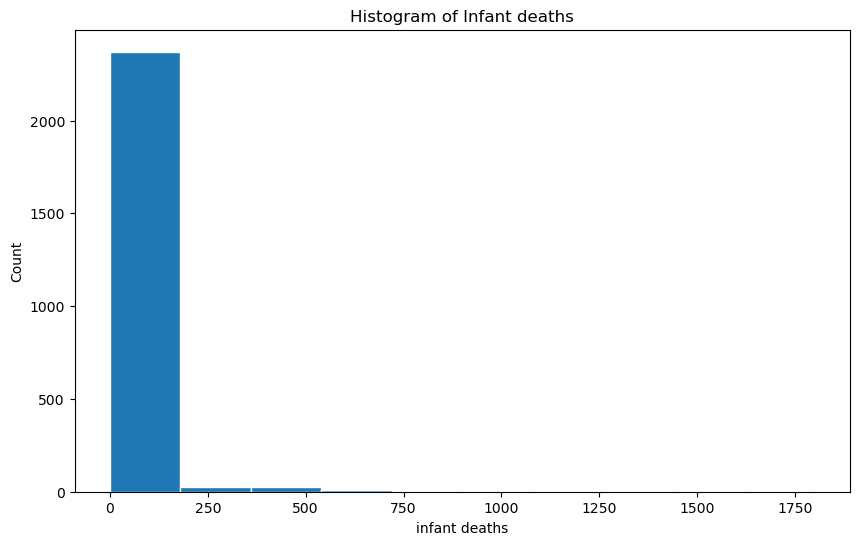

In [8]:
plot_histogram(df['Infant deaths'], 'Count', 'infant deaths', 'Histogram of Infant deaths')

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Infant deaths'>

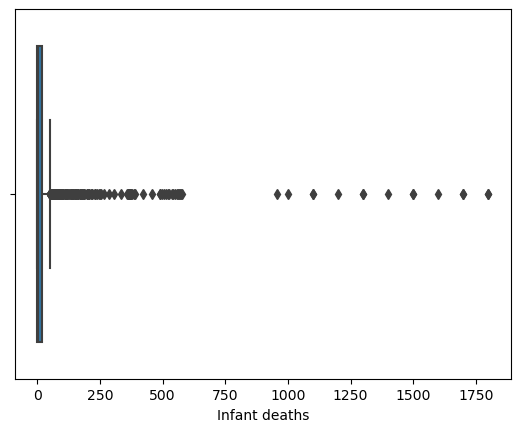

In [9]:
sns.boxplot(data=df, x=df['Infant deaths'])

In [10]:
outlier = get_outlier(df, 'Infant deaths')[['Country', 'Year', 'Infant deaths']]
outlier

,Country,Year,Infant deaths
0,South Africa,2008,50
1,Cameroon,2012,50
2,Niger,2011,50
3,Niger,2010,50
4,Cameroon,2011,51
...,...,...,...
279,India,2004,1600
280,India,2002,1700
281,India,2003,1700
282,India,2000,1800


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Infant deaths'>

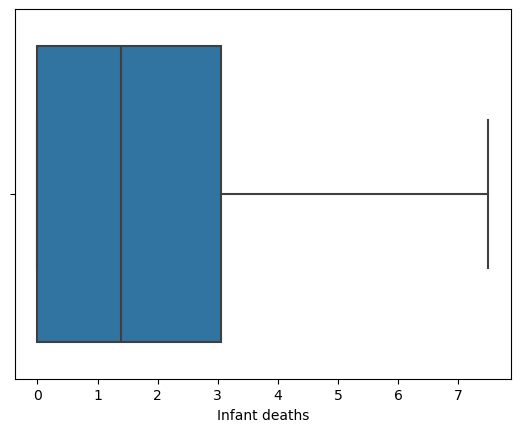

In [11]:
df['Infant deaths'] = np.log(df['Infant deaths'] + 1)
sns.boxplot(data=df, x=df['Infant deaths'])
#print(df.drop(['Country', 'Status'], axis=1).skew())

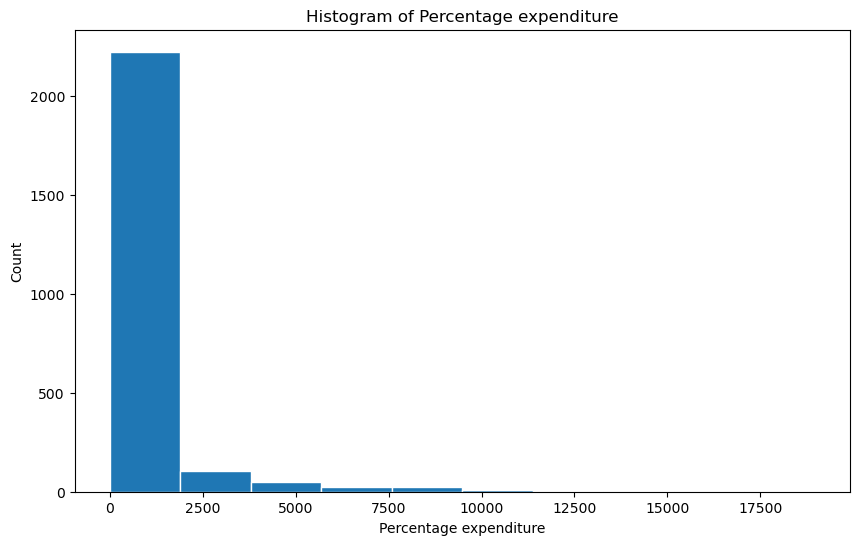

In [12]:
plot_histogram(df['Percentage expenditure'], 'Count', 'Percentage expenditure', 'Histogram of Percentage expenditure')

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Percentage expenditure'>

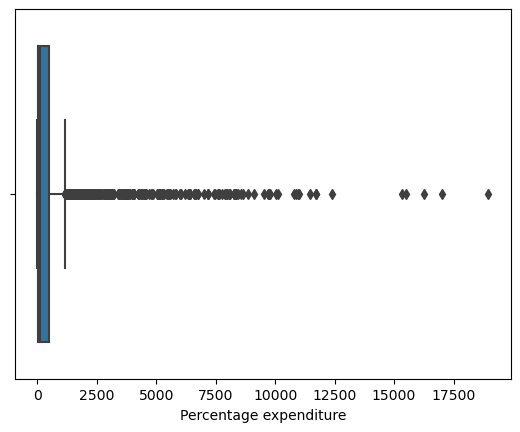

In [13]:
sns.boxplot(data=df, x=df['Percentage expenditure'])

In [14]:
outlier = get_outlier(df, 'Percentage expenditure')[['Country', 'Year', 'Percentage expenditure']]
outlier

,Country,Year,Percentage expenditure
0,Oman,2013,1154.893
1,Antigua and Barbuda,2003,1158.065
2,Netherlands,2012,1162.657
3,Suriname,2012,1168.324
4,Costa Rica,2006,1185.412
...,...,...,...
295,Luxembourg,2006,15345.491
296,Luxembourg,2013,15515.752
297,Luxembourg,2014,16255.162
298,Luxembourg,2011,17028.528


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Percentage expenditure'>

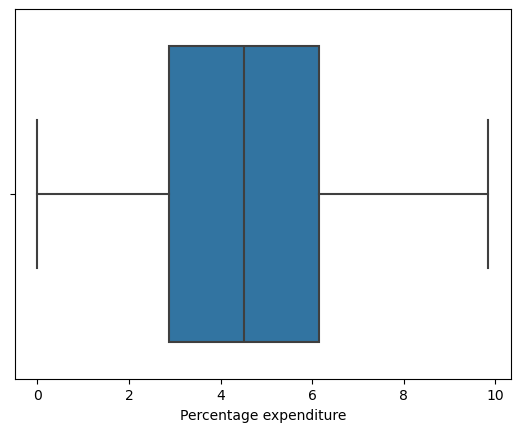

In [15]:
df['Percentage expenditure'] = np.log(df['Percentage expenditure'] + 1)
sns.boxplot(data=df, x=df['Percentage expenditure'])

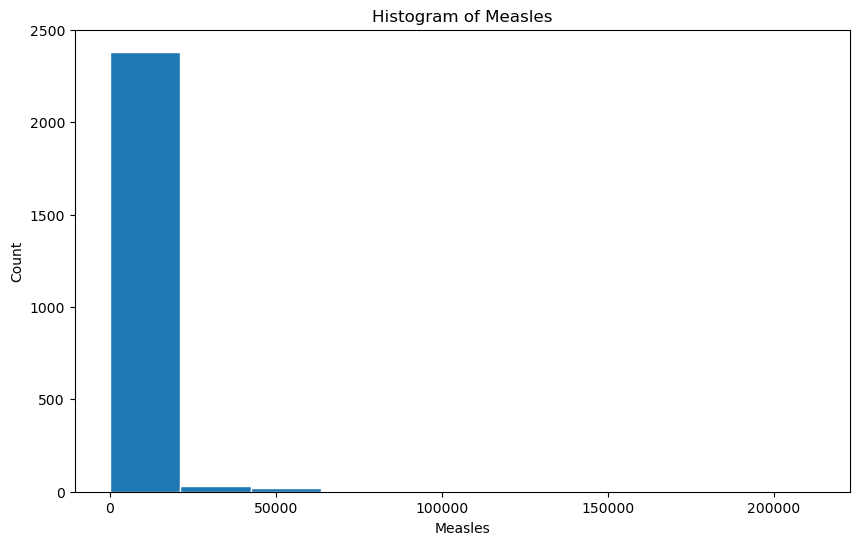

In [16]:
plot_histogram(df['Measles'], 'Count', 'Measles', 'Histogram of Measles')

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Measles'>

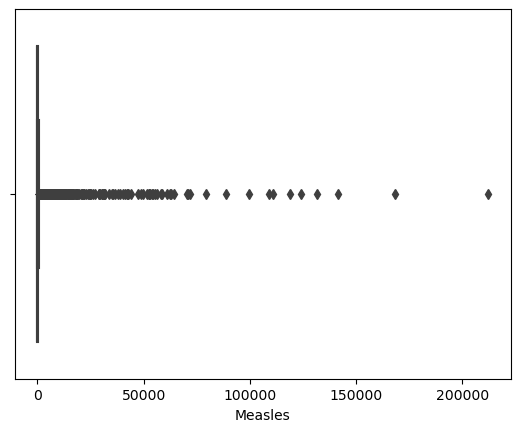

In [17]:
sns.boxplot(data=df, x=df['Measles'])

In [18]:
outlier = get_outlier(df, 'Measles')[['Country', 'Year', 'Measles']]
outlier

,Country,Year,Measles
0,Mauritania,2002,883
1,Yemen,2002,890
2,Rwanda,2001,896
3,Zambia,2012,896
4,Cameroon,2003,899
...,...,...,...
448,China,2005,124219
449,China,2008,131441
450,Nigeria,2003,141258
451,Nigeria,2001,168107


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Measles'>

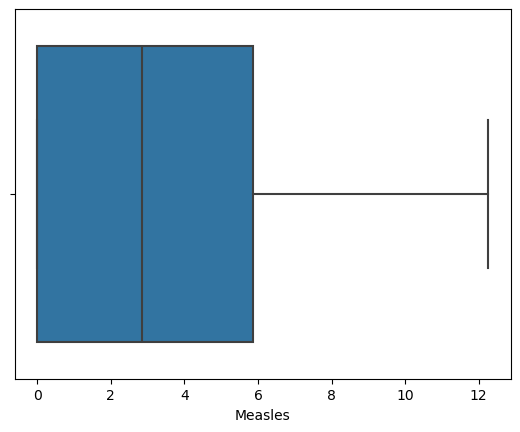

In [19]:
df['Measles'] = np.log(df['Measles'] + 1)
sns.boxplot(data=df, x=df['Measles'])

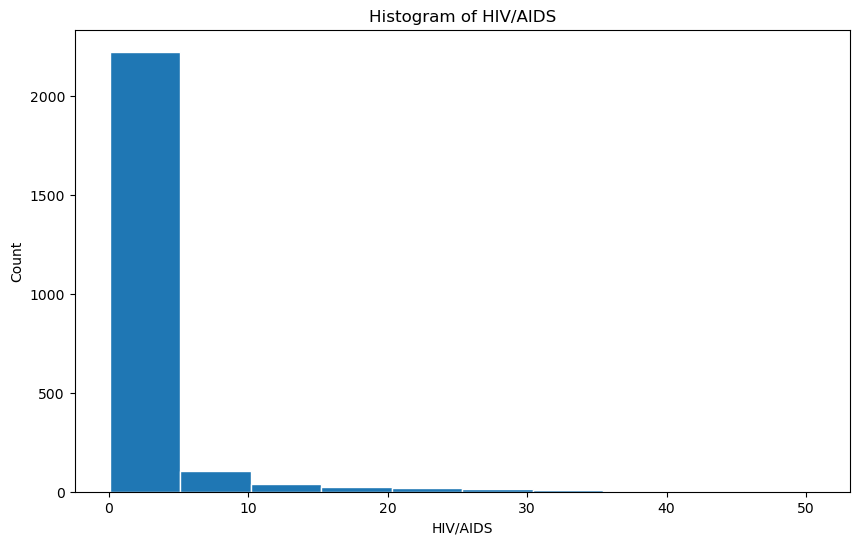

In [20]:
plot_histogram(df['HIV/AIDS'], 'Count', 'HIV/AIDS', 'Histogram of HIV/AIDS')

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='HIV/AIDS'>

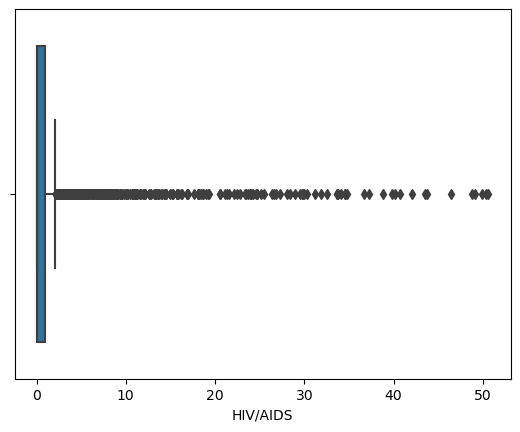

In [21]:
sns.boxplot(data=df, x=df['HIV/AIDS'])

In [22]:
outlier = get_outlier(df, 'HIV/AIDS')[['Country', 'Year', 'HIV/AIDS']]
outlier

,Country,Year,HIV/AIDS
0,Angola,2001,2.100
1,Benin,2003,2.100
2,Benin,2002,2.100
3,Benin,2001,2.100
4,Sierra Leone,2004,2.100
...,...,...,...
432,Swaziland,2001,48.800
433,Swaziland,2005,49.100
434,Swaziland,2002,49.900
435,Swaziland,2004,50.300


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='HIV/AIDS'>

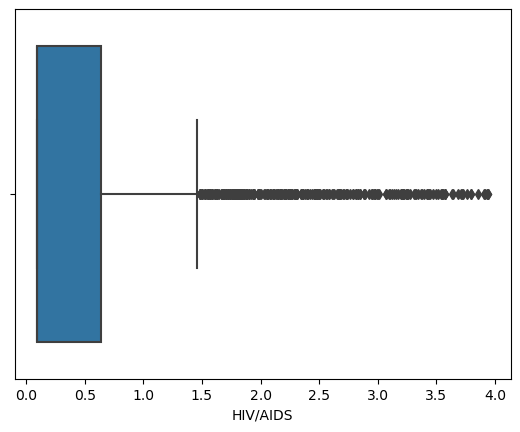

In [23]:
df['HIV/AIDS'] = np.log(df['HIV/AIDS'] + 1)
sns.boxplot(data=df, x=df['HIV/AIDS'])

In [24]:
df.skew(axis = 0, numeric_only = True)

Year                               0.000
Life expectancy                   -0.686
Adult mortality                    1.221
Infant deaths                      0.725
Alcohol                            0.718
Percentage expenditure            -0.234
Hepatitis B                       -1.438
Measles                            0.552
BMI                               -0.214
Polio                             -2.046
Total expenditure                  0.390
Diphtheria                        -2.046
HIV/AIDS                           2.075
Thinness 1-19 years                1.659
Income composition of resources   -1.169
Schooling                         -0.521
dtype: float64

In [25]:
X = df.drop(['Country', 'Year', 'Life expectancy'], axis=1)
y = df.loc[:,'Life expectancy']
X

,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Thinness 1-19 years,Income composition of resources,Schooling
0,321.000,4.489,0.010,2.436,62.000,8.785,12.200,24.000,8.200,24.000,0.095,2.300,0.338,5.500
1,316.000,4.489,0.010,2.449,63.000,9.078,12.600,35.000,7.800,33.000,0.095,2.100,0.340,5.900
2,3.000,4.489,0.010,2.884,64.000,7.819,13.000,36.000,7.760,36.000,0.095,19.900,0.341,6.200
3,295.000,4.477,0.010,2.492,65.000,6.683,13.400,41.000,8.820,41.000,0.095,19.700,0.373,6.500
4,293.000,4.477,0.020,2.791,67.000,6.146,13.800,5.000,8.790,5.000,0.095,19.500,0.381,6.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,527.000,3.401,5.210,3.995,9.000,9.180,29.400,89.000,5.370,89.000,2.815,7.100,0.436,10.000
2441,464.000,3.367,6.000,4.171,94.000,0.000,29.900,93.000,6.310,93.000,2.660,6.800,0.452,10.100
2442,429.000,3.296,6.090,4.539,97.000,0.000,3.300,95.000,6.690,95.000,2.282,6.500,0.464,9.800
2443,399.000,3.258,6.390,2.457,95.000,0.000,3.800,95.000,6.880,95.000,2.054,6.200,0.488,10.400


In [26]:
y

0      54.800
1      55.300
2      56.200
3      56.700
4      57.000
        ...  
2440   52.400
2441   54.900
2442   56.600
2443   58.000
2444   59.200
Name: Life expectancy, Length: 2445, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Thinness 1-19 years,Income composition of resources,Schooling
2242,12.000,1.386,1.240,6.154,98.000,1.609,53.900,98.000,5.640,98.000,0.095,6.300,0.695,14.300
1627,276.000,3.989,0.100,3.606,71.000,5.645,16.100,57.000,6.940,57.000,0.875,11.400,0.293,3.800
17,15.000,0.693,3.730,4.659,96.000,2.833,46.900,98.000,6.300,98.000,0.095,2.000,0.670,10.700
1544,21.000,3.714,0.010,3.836,88.000,4.812,22.900,88.000,2.280,88.000,0.262,12.900,0.547,9.100
946,247.000,0.693,6.710,2.806,85.000,0.000,36.400,9.000,5.820,85.000,0.993,5.900,0.606,10.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,83.000,3.045,0.010,0.000,99.000,5.247,57.200,98.000,6.490,98.000,0.095,8.200,0.769,15.000
1731,134.000,2.565,4.220,6.109,94.000,0.000,49.500,94.000,4.470,94.000,0.336,1.200,0.693,13.000
763,237.000,4.984,1.860,2.231,72.000,8.567,16.800,7.000,5.190,72.000,0.642,1.600,0.427,8.400
835,132.000,0.693,7.240,5.274,95.000,3.135,52.000,88.000,1.500,92.000,0.095,2.600,0.738,13.300


In [28]:
scaler = StandardScaler()
transformed_X_train = scaler.fit_transform(X_train)
transformed_X_test = scaler.transform(X_test)
pd.DataFrame(transformed_X_train).to_csv('Datasets/Kaggle Transformed/X_train without PCA.csv', index=False, header=X_test.columns)
pd.DataFrame(transformed_X_test).to_csv('Datasets/Kaggle Transformed/X_test without PCA.csv', index=False, header=X_test.columns)
y_train.to_csv('Datasets/Kaggle Transformed/y_train.csv', index=False)
y_test.to_csv('Datasets/Kaggle Transformed/y_test.csv', index=False)

In [29]:
pd.DataFrame(transformed_X_train, columns=X_test.columns)

,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Thinness 1-19 years,Income composition of resources,Schooling
0,-1.231,-0.217,-0.790,0.727,0.773,-0.505,0.801,0.668,-0.049,0.670,-0.543,0.269,0.370,0.768
1,0.907,1.381,-1.078,-0.336,-0.181,0.745,-1.105,-1.093,0.517,-1.095,0.435,1.399,-1.587,-2.549
2,-1.207,-0.642,-0.161,0.103,0.702,-0.126,0.448,0.668,0.238,0.670,-0.543,-0.683,0.248,-0.369
3,-1.158,1.212,-1.101,-0.240,0.419,0.487,-0.762,0.239,-1.513,0.240,-0.333,1.732,-0.351,-0.875
4,0.672,-0.642,0.593,-0.669,0.313,-1.004,-0.081,-3.155,0.029,0.110,0.583,0.181,-0.063,-0.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,-0.656,0.801,-1.101,-1.840,0.808,0.622,0.967,0.668,0.321,0.670,-0.543,0.690,0.730,0.989
1952,-0.243,0.507,-0.037,0.708,0.631,-1.004,0.579,0.496,-0.559,0.498,-0.240,-0.861,0.360,0.357
1953,0.591,1.991,-0.633,-0.909,-0.146,1.651,-1.069,-3.241,-0.245,-0.449,0.142,-0.772,-0.935,-1.096
1954,-0.259,-0.642,0.727,0.360,0.667,-0.032,0.705,0.239,-1.852,0.412,-0.543,-0.551,0.579,0.452


In [30]:
pca = PCA(n_components=0.9)
pca_data = pca.fit(transformed_X_train)
pca_data.explained_variance_ratio_

array([0.3681703 , 0.11552068, 0.09310842, 0.0816663 , 0.06174023,
       0.04904941, 0.04432826, 0.03754385, 0.03633541, 0.02910283])

In [31]:
np.cumsum(np.round(pca_data.explained_variance_ratio_, decimals = 4) * 100)

array([36.82, 48.37, 57.68, 65.85, 72.02, 76.92, 81.35, 85.1 , 88.73,
       91.64])

In [32]:
X_train = pca.transform(transformed_X_train)
X_test = pca.transform(transformed_X_test)
X_train.shape

(1956, 10)

In [34]:
header = [f'PCA{i}' for i in range(1,11)]
pd.DataFrame(X_train).to_csv('Datasets/Kaggle Transformed/X_train with PCA.csv', index=False, header=header)
pd.DataFrame(X_test).to_csv('Datasets/Kaggle Transformed/X_test with PCA.csv', index=False, header=header)